# Load imports and data

In [354]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import missingno as msno


In [355]:
accounts = pd.read_csv('data/account.csv', sep=';')
clients = pd.read_csv('data/client.csv', sep=';')
disp = pd.read_csv('data/disp.csv', sep=';')
districts = pd.read_csv('data/district.csv', sep=';')

# Do analysis in all data:
# (Safe because the rest of the notebook takes into account dates and whether the data is dev or comp, allowing it to keep the data separated)
# (To be safer, run the script with only the development data and then only the competition data (see below), confirming the data processing results are the same)

cards = pd.read_csv('data/card.csv', sep=';')
loans = pd.read_csv('data/loan.csv', sep=';')
trans = pd.read_csv('data/trans.csv', sep=';')

# Only do analysis on development data:
# (In order to reproduce data exploration from the report, run this script with only the development data)

# cards = pd.read_csv('data/card_dev.csv', sep=';')
# loans = pd.read_csv('data/loan_dev.csv', sep=';')
# trans = pd.read_csv('data/trans_dev.csv', sep=';')

# Only run analysis on competition data:

# cards = pd.read_csv('data/card_comp.csv', sep=';')
# loans = pd.read_csv('data/loan_comp.csv', sep=';')
# trans = pd.read_csv('data/trans_comp.csv', sep=';')

# Data Understanding

In [356]:
loans

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1.0
1,5316,1801,930711,165960,36,4610,1.0
2,6863,9188,930728,127080,60,2118,1.0
3,5325,1843,930803,105804,36,2939,1.0
4,7240,11013,930906,274740,60,4579,1.0
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348,NaN
678,5221,1284,981205,52512,12,4376,NaN
679,6402,6922,981206,139488,24,5812,NaN
680,5346,1928,981206,55632,24,2318,NaN


In [357]:
def info(table, name):
    print("==============")
    print(name)
    print("--------------")
    print(table.info(verbose=True, max_cols=1000, memory_usage=False, show_counts=True))
    print("--------------")
    print("Description of the table (table.describe()). For some columns, such as ids, these metrics are not useful and should be ignored.")
    print(table.describe())
    print("--------------")
    for column in table.columns:
        values = table[column].unique()
        if len(values) < 10:
            print(f"\tColumn {column} can have values {values}")
        if "?" in values:
            print(f"\tColumn {column} has at least one value '?'")
    print("\n\n")
    
info(accounts, "accounts")
info(cards, "cards")
info(clients, "clients")
info(disp, "disp")
info(districts, "districts")
info(loans, "loans")
info(trans, "transactions")


accounts
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)None
--------------
Description of the table (table.describe()). For some columns, such as ids, these metrics are not useful and should be ignored.
         account_id  district_id           date
count   4500.000000  4500.000000    4500.000000
mean    2786.067556    37.310444  951654.608667
std     2313.811984    25.177217   14842.188377
min        1.000000     1.000000  930101.000000
25%     1182.750000    13.000000  931227.000000
50%     2368.000000    38.000000  960102.000000
75%     3552.250000    60.000000  961101.000000
max    11382.000000    77.000000  971229.000000
--------------
	C

C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarni

           loan_id    account_id           date         amount    duration  \
count   682.000000    682.000000     682.000000     682.000000  682.000000   
mean   6172.466276   5824.162757  963027.910557  151410.175953   36.492669   
std     682.579279   3283.512681   14616.406049  113372.406310   17.075219   
min    4959.000000      2.000000  930705.000000    4980.000000   12.000000   
25%    5577.500000   2967.000000  950704.500000   66732.000000   24.000000   
50%    6176.500000   5738.500000  970206.500000  116928.000000   36.000000   
75%    6752.500000   8686.000000  971212.500000  210654.000000   48.000000   
max    7308.000000  11362.000000  981208.000000  590820.000000   60.000000   

          payments      status  
count   682.000000  328.000000  
mean   4190.664223    0.719512  
std    2215.830344    0.695541  
min     304.000000   -1.000000  
25%    2477.000000    1.000000  
50%    3934.000000    1.000000  
75%    5813.500000    1.000000  
max    9910.000000    1.000000  


C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426885 entries, 0 to 426884
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    426885 non-null  int64  
 1   account_id  426885 non-null  int64  
 2   date        426885 non-null  int64  
 3   type        426885 non-null  object 
 4   operation   350994 non-null  object 
 5   amount      426885 non-null  float64
 6   balance     426885 non-null  float64
 7   k_symbol    224222 non-null  object 
 8   bank        103065 non-null  object 
 9   account     111368 non-null  float64
dtypes: float64(3), int64(3), object(4)None
--------------
Description of the table (table.describe()). For some columns, such as ids, these metrics are not useful and should be ignored.
           trans_id     account_id           date         amount  \
count  4.268850e+05  426885.000000  426885.000000  426885.000000   
mean   1.292993e+06    2729.963262  952608.706991    5911.1042

C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\3613255769.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in values:


	Column k_symbol can have values [nan 'interest credited' ' ' 'household' 'payment for statement'
 'insurrance payment' 'sanction interest if negative balance'
 'old-age pension']





In [358]:
districts[districts['unemploymant rate \'95 '] == '?']

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,?,7.01,124,?,1358


In [359]:
districts[districts['no. of commited crimes \'95 '] == '?']

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,?,7.01,124,?,1358


- Null values: Only transactions_dev and district have null values
    - transactions_dev: operation, k_symbol, bank, account
    - district: unemploymant rate '95, no. of commited crimes '95

- Dates: We should confirm that for a loan in a given date we only consider accounts/clients/transactions/etc from before that date, using the respective date fields

### Collected Data

- account.csv - relation account (4500 objects) 
- client.csv - relation client (5369 objects)
- disp.csv - relation disposition (5369 objects) 
- district.csv - relation demographic data (77 objects)
- ~~relation permanent order (0/6471 objects)~~
- trans_dev.csv - relation transaction (396685/1056320 objects)
- card_dev.csv - relation credit card (177/892 objects)
- loan_dev.csv - relation loan (328/682 objects)


accounts : 4500 objects
 #  | Column    |   Non-Null Count | type 
--- | ------     |  -------------- | ----- 
 0 |  account_id  | 4500 non-null |  PRIMARY KEY 
 1  | district_id|  4500 non-null |  FOREIGN KEY 
 2  | frequency  |  4500 non-null |  enum('monthly issuance', 'issuance after transaction', 'weekly issuance')
 3  | date       |  4500 non-null |  YYMMDD


clients : 5369 objects
 #  | Column        |Non-Null Count|  type
--- | ------        |--------------|  -----
 0  | client_id     |5369 non-null |  PRIMARY KEY
 1  | birth_number | 5369 non-null |  YYMMDD + 5000 if woman
 2   |district_id |  5369 non-null |  FOREIGN KEY


disp : 5369 objects
 #  | Column     | Non-Null Count | type 
--- | ------     | -------------- | ----- 
 0  | disp_id    | 5369 non-null  | PRIMARY KEY 
 1  | client_id  | 5369 non-null  | FOREIGN KEY 
 2  | account_id | 5369 non-null  | FOREIGN KEY 
 3  | type       | 5369 non-null  | enum('OWNER', 'DISPONENT')


districts : 77 objects
 #  | Column                                            | Non-Null Count | type  
--- | ------                                            | -------------- | -----  
 0  | code                                              | 77 non-null    | PRIMARY KEY  
 1  | name                                              | 77 non-null    | UNIQUE KEY 
 2  | region                                            | 77 non-null    | enum('Prague', 'central Bohemia', 'south Bohemia', 'west Bohemia', 'north Bohemia', 'east Bohemia', 'south Moravia', 'north Moravia')
 3  | no. of inhabitants                                | 77 non-null    | int  
 4  | no. of municipalities with inhabitants < 499      | 77 non-null    | int  
 5  | no. of municipalities with inhabitants 500-1999   | 77 non-null    | int  
 6  | no. of municipalities with inhabitants 2000-9999  | 77 non-null    | int  
 7  | no. of municipalities with inhabitants >10000     | 77 non-null    | int  
 8  | no. of cities                                     | 77 non-null    | int  
 9  | ratio of urban inhabitants                       |  77 non-null    | float
 10 | average salary                                  |   77 non-null    | int (currency unit)  
 11 | unemploymant rate '95                          |    77 non-null    | float 
 12 | unemploymant rate '96                         |     77 non-null    | float
 13 | no. of enterpreneurs per 1000 inhabitants    |      77 non-null    | int  
 14 | no. of commited crimes '95                  |       77 non-null    | int 
 15 | no. of commited crimes '96                 |        77 non-null    | int  

transactions : 396685/1056320 objects
 #  | Column    |  Non-Null Count |  type  
--- | ------    |  -------------- |  -----  
 0  | trans_id  |  396685 non-null|  PRIMARY KEY  
 1  | account_id|  396685 non-null|  FOREIGN KEY  
 2  | date      |  396685 non-null|  YYMMDD
 3  | type      |  396685 non-null|  enum('credit', 'withdrawal', 'withdrawal in cash') 
 4  | operation |  325924 non-null|  enum('credit in cash', 'collection from another bank', 'withdrawal in cash', 'remittance to another bank', 'credit card withdrawal')
 5  | amount    |  396685 non-null|  float64 (currency unit)
 6  | balance   |  396685 non-null|  float64 (currency unit)
 7  | k_symbol  |  211441 non-null|  enum('interest credited', ' ', 'household', 'payment for statement', 'insurrance payment', 'sanction interest if negative balance', 'old-age pension')
 8  | bank      |  97242 non-null |  string (other bank ID)
 9  | account   |  102229 non-null|  account (other bank's account ID)

- type="withdrawal in cash" is redundant with operation="withdrawal in cash"

cards : 177/892 objects
 #  | Column  | Non-Null Count | type 
--- | ------  | -------------- | ----- 
 0  | card_id | 177 non-null   | PRIMARY KEY 
 1  | disp_id | 177 non-null   | FOREIGN KEY 
 2  | type    | 177 non-null   | enum('classic', 'junior', 'gold')
 3  | issued  | 177 non-null   | YYMMDD 

loans_dev : 328/682 objects
 #  | Column     | Non-Null Count | type
--- | ------     | -------------- | -----
 0  | loan_id    | 328 non-null   | PRIMARY KEY
 1  | account_id | 328 non-null   | FOREIGN KEY
 2  | date       | 328 non-null   | YYMMDD
 3  | amount     | 328 non-null   | derived(duration*payments)
 4  | duration   | 328 non-null   | int (number of months)
 5  | payments   | 328 non-null   | int (currency unit/month)
 6  | **status** |     328 non-null  |  TARGET (1 = paid, -1 = not paid)

- binarize status (1 = not paid, 0 = paid)
- encode duration by year (is by month at the moment, but always multiples of 12)


### Check table association multiplicities

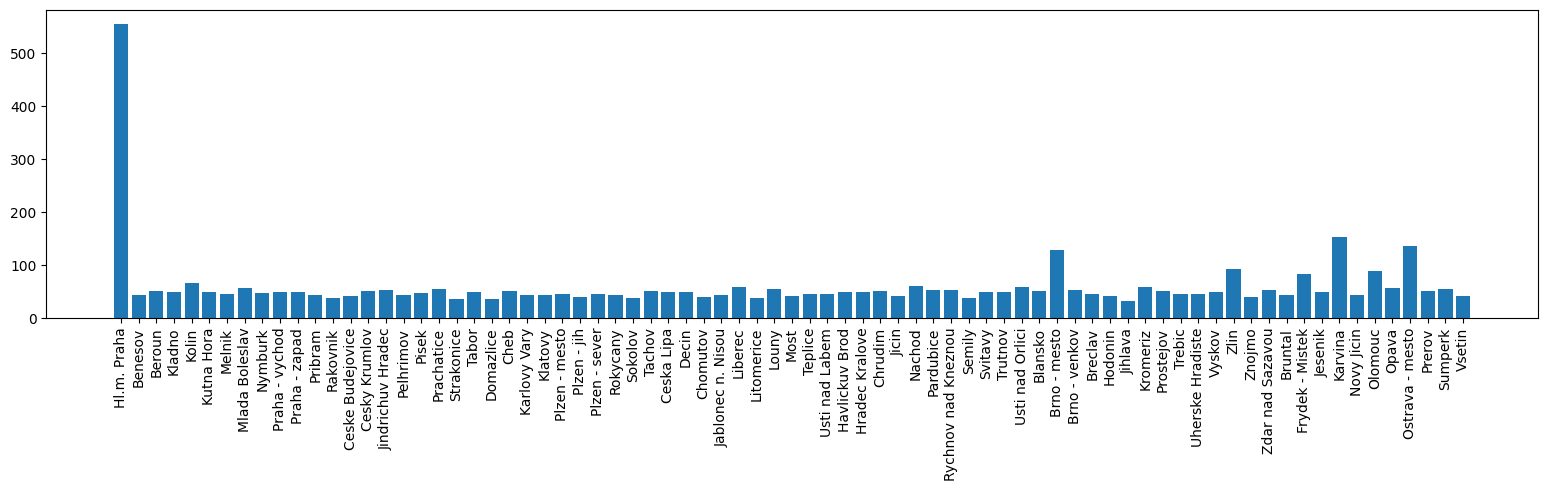

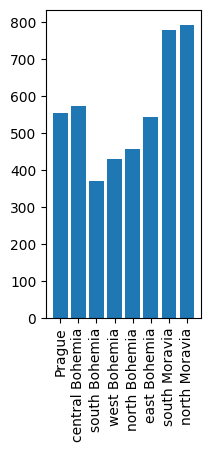

In [360]:
# Account -*----------1-> District

# How many accounts has each district

accounts_count_per_district_array = accounts.value_counts('district_id').sort_index().array
accounts_count_per_district = { name: accounts_count_per_district_array[idx - 1] for idx, name in districts[['code ', 'name ']].values}


accounts_count_per_region = {} 
for idx, region in districts[['code ', 'region']].values:
    accounts_count_per_region[region] = accounts_count_per_region.get(region, 0) + accounts_count_per_district_array[idx - 1]

def dict_barplot(dict):
    """From a dict {x:y} it plots a barplot"""
    lenx = len(dict.keys())
    plt.figure(figsize=(lenx/4, 4))
    plt.bar(range(lenx), list(dict.values()), align='center')
    plt.xticks(range(lenx), list(dict.keys()), rotation=90)
    plt.show()

dict_barplot(accounts_count_per_district)
dict_barplot(accounts_count_per_region)

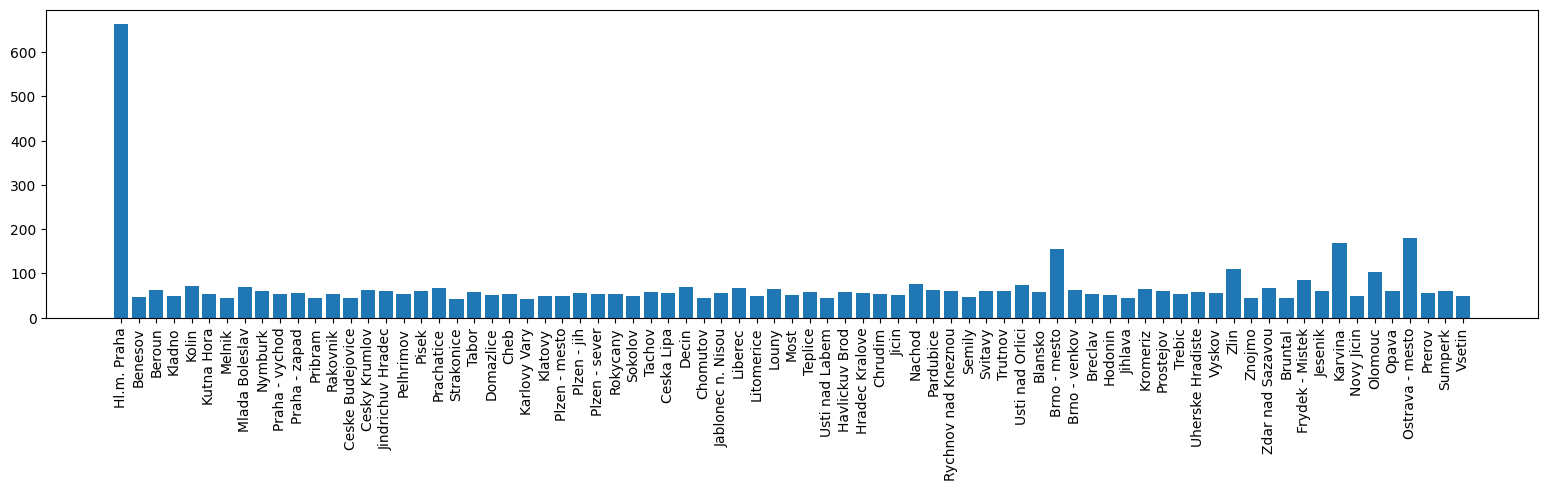

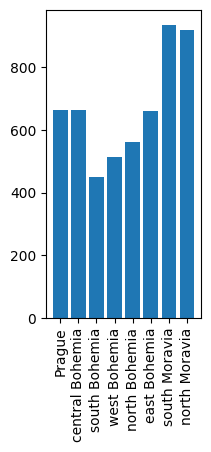

In [361]:
# Client -*----------1-> District

# How many clients has each district

client_count_per_district_array = clients.value_counts('district_id').sort_index().array
client_count_per_district = { name: client_count_per_district_array[idx - 1] for idx, name in districts[['code ', 'name ']].values}


client_count_per_region = {} 
for idx, region in districts[['code ', 'region']].values:
    client_count_per_region[region] = client_count_per_region.get(region, 0) + client_count_per_district_array[idx - 1]

dict_barplot(client_count_per_district)
dict_barplot(client_count_per_region)

In [362]:
# Account <-1----------1..2- Disposition -1----------1-> Client


clients_dict = {}
for idx, client, account, type in disp[['disp_id', 'client_id', 'account_id', 'type']].values:
    if client in clients_dict:
        print("DUPLICATE CLIENT", clients_dict[client])
        # THERE ARE NO DUPLICATE CLIENTS: client_id is just as unique as disp_id
        
    clients_dict[client] = clients_dict.get(client, 0) + 1

print("No clients missing from disposition:", set(clients['client_id'].values) == set(disp['client_id'].values))
print("No accounts missing from disposition:", set(accounts['account_id'].values) == set(disp['account_id'].values))

# EVERY ACCOUNT HAS 1 OWNER AND 0..1 DISPONENTS
for account in set(accounts['account_id'].values):
    disp_row = disp[disp['account_id'] == account]
    types = disp_row['type'].value_counts()
    if types.get('OWNER', 0) != 1:
        print("Account", account, "has", types.get('OWNER', 0), "owners")
    if types.get('DISPONENT', 0) != 0 and types.get('DISPONENT', 0) != 1:
        print("Account", account, "has", types.get('DISPONENT', 0), "disponents")

No clients missing from disposition: True
No accounts missing from disposition: True


In [363]:
# acc_district != owner_district != disponent_district
for account, acc_district in accounts[['account_id', 'district_id']].values:
    disp_row = disp[disp['account_id'] == account]
    owner_id = disp_row[disp_row['type'] == 'OWNER']['client_id'].values[0]
    owner = clients[clients['client_id'] == owner_id]
    owner_district = owner['district_id'].values[0]

    disponent_id = disp_row[disp_row['type'] == 'DISPONENT']
    if disponent_id.shape[0] == 1:
        disponent_id = disponent_id['client_id'].values[0]
        disponent = clients[clients['client_id'] == disponent_id]
        disponent_district = disponent['district_id'].values[0]
        print(acc_district, owner_district, disponent_district)
    else:
        print(acc_district, owner_district)


55 74 74
74 1 1
55 22 22
16 16
24 24
77 46
1 64
47 76 76
74 74
76 76
48 48 48
70 70
19 19
62 28
6 75
21 5
70 70
44 44
37 58 58
10 25
41 41
36 36 36
1 1
26 9 9
55 55
1 1
7 8
68 29
54 54
41 49
38 38
1 1
41 41
38 38
1 1
9 9
60 60
44 34
26 27 27
37 37
74 74 74
14 40
3 3 3
44 41
44 44
53 53
1 15
50 50
33 33 33
15 15
4 4
55 55 55
15 54
32 32
1 1
54 54
40 40 40
54 54 54
66 19
27 27
49 49
47 47
45 1
52 14
74 44
60 60 60
73 21
41 50
74 74 74
25 8
41 41
68 70
23 23
66 66
75 75
1 1
54 3
77 77
1 1
68 68 68
12 4
46 74
13 13
27 27
30 30
48 48
70 40
59 69
32 32
63 63
64 74
61 61 61
72 72
12 14
1 52
40 40
36 13 13
44 30
1 48
17 1
16 15
68 68
64 70
1 1 1
54 15
1 1
7 7
67 45
1 32
32 32
54 54
70 70
14 60
63 63
61 61
64 64 64
48 38
1 31 31
73 28
6 6
70 57
1 77
10 20 20
74 74
24 12
1 1
50 50
6 6
74 74 74
45 45
57 57
6 6
10 10 10
38 75
16 16
75 75
16 16
64 64
51 51
72 43
27 1
46 46
68 46
31 31
1 63
30 38
51 51 51
74 74
13 13
21 21
66 66
51 51
16 16
21 21
68 74 74
30 30 30
1 19
24 59
10 71
71 8
50 50
70 70
2

In [364]:
# Card -0..1----------1-> Disponent
disponents_dict = {}
for idx, disponent in cards[['card_id', 'disp_id']].values:
    if disponent in disponents_dict:
        print("DUPLICATE DISPONENT", disponents_dict[disponent])
        # THERE ARE NO DUPLICATE DISPONENTS: disp_id is just as unique as card_id
    disponents_dict[disponent] = disponents_dict.get(disponent, 0) + 1

# There are disp without cards
print("No disps missing from cards:", set(disp['disp_id'].values) == set(cards['disp_id'].values))

No disps missing from cards: False


In [365]:
# Transaction -0..*----------1-> Account
print("No accounts missing from transactions:", set(accounts['account_id'].values) == set(trans['account_id'].values))

accounts_dict = {account: 0 for account in accounts['account_id'].values}
for idx, account in trans[['trans_id', 'account_id']].values:
    accounts_dict[account] = accounts_dict.get(account, 0) + 1

print("Accounts in dev have between", min(accounts_dict.values()), "and", max(accounts_dict.values()), "transactions")


No accounts missing from transactions: False
Accounts in dev have between 0 and 441 transactions


In [366]:
# Loan -0..1----------1-> Account
accounts_dict = {}
for idx, account in loans[['loan_id', 'account_id']].values:
    if account in accounts_dict:
        print("DUPLICATE ACCOUNT", accounts_dict[account])
        # THERE ARE NO DUPLICATE ACCOUNTS: account_id is just as unique as loan_id
    accounts_dict[account] = accounts_dict.get(account, 0) + 1

# There are accounts without loans
print("No accounts missing from loans:", set(accounts['account_id'].values) == set(loans['account_id'].values))

No accounts missing from loans: False


### Plots and statistics

<AxesSubplot: >

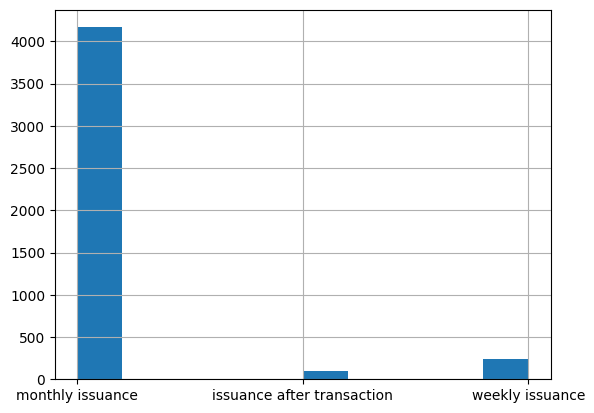

In [367]:
accounts['frequency'].hist()

<AxesSubplot: >

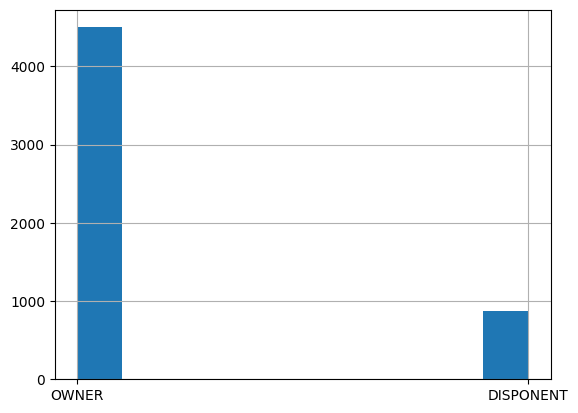

In [368]:
disp['type'].hist()

C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\102409225.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


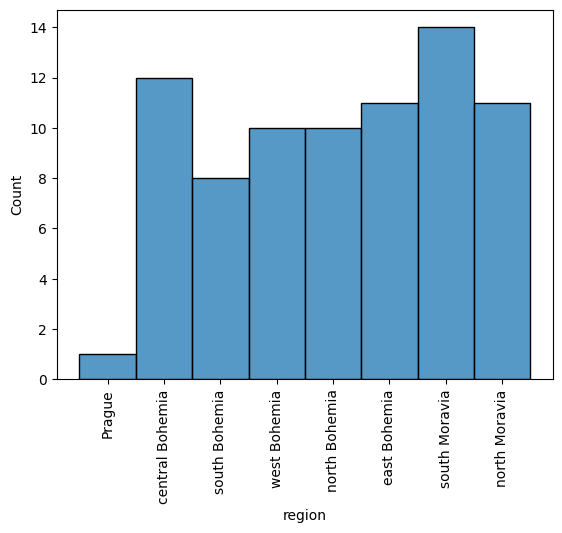

In [369]:
# x labels rotated 90º
g = sns.histplot(districts, x='region')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


<AxesSubplot: >

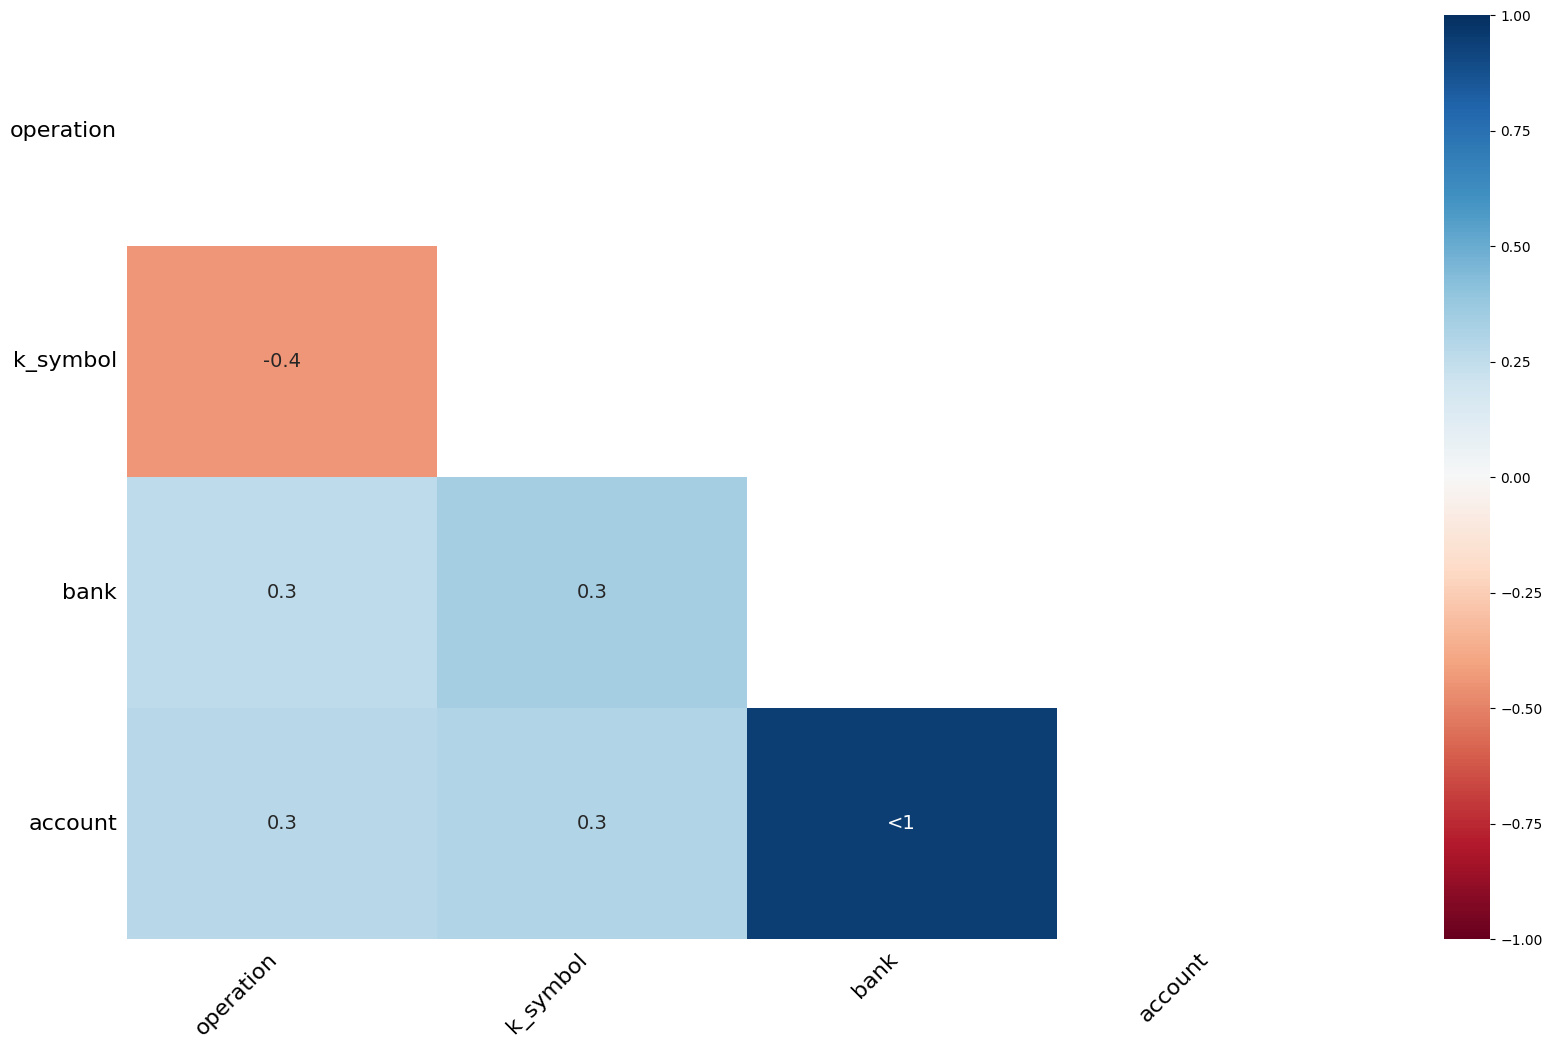

In [370]:
# Correlation of missing values (how much a value missing in one column is correlated with a value being missing in another column)
msno.heatmap(trans)

# Bank and account very correlated, as expected (both are missing at the same time)

<AxesSubplot: >

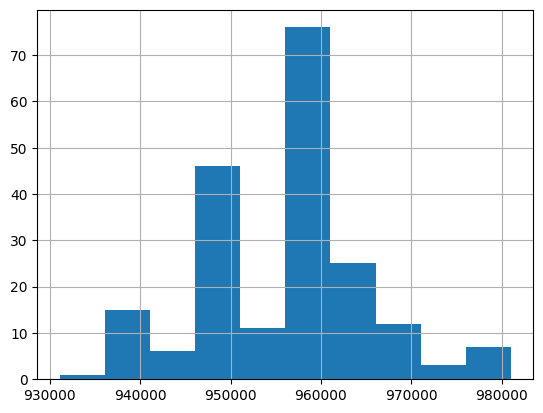

In [371]:
cards['issued'].hist()

<AxesSubplot: xlabel='amount', ylabel='balance'>

C:\Users\PedroGoncaloCorreia\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\PedroGoncaloCorreia\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


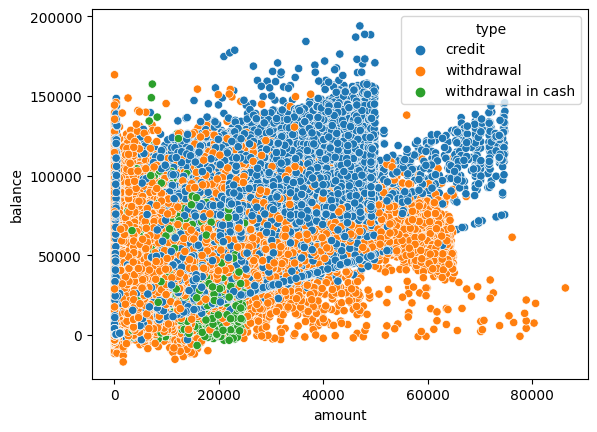

In [372]:
sns.scatterplot(trans, x='amount', y='balance', hue='type')

# Data Preparation

Also includes the parts of data understanding and exploration which require some preparation.

### District

In [373]:
# Consider '?' as NaN and treat respetive columns as floats, so we can plot the correlation matrix
districts.replace('?', np.nan, inplace=True)
districts['no. of commited crimes \'95 '] = districts['no. of commited crimes \'95 '].astype(float)
districts['unemploymant rate \'95 '] = districts['unemploymant rate \'95 '].astype(float)

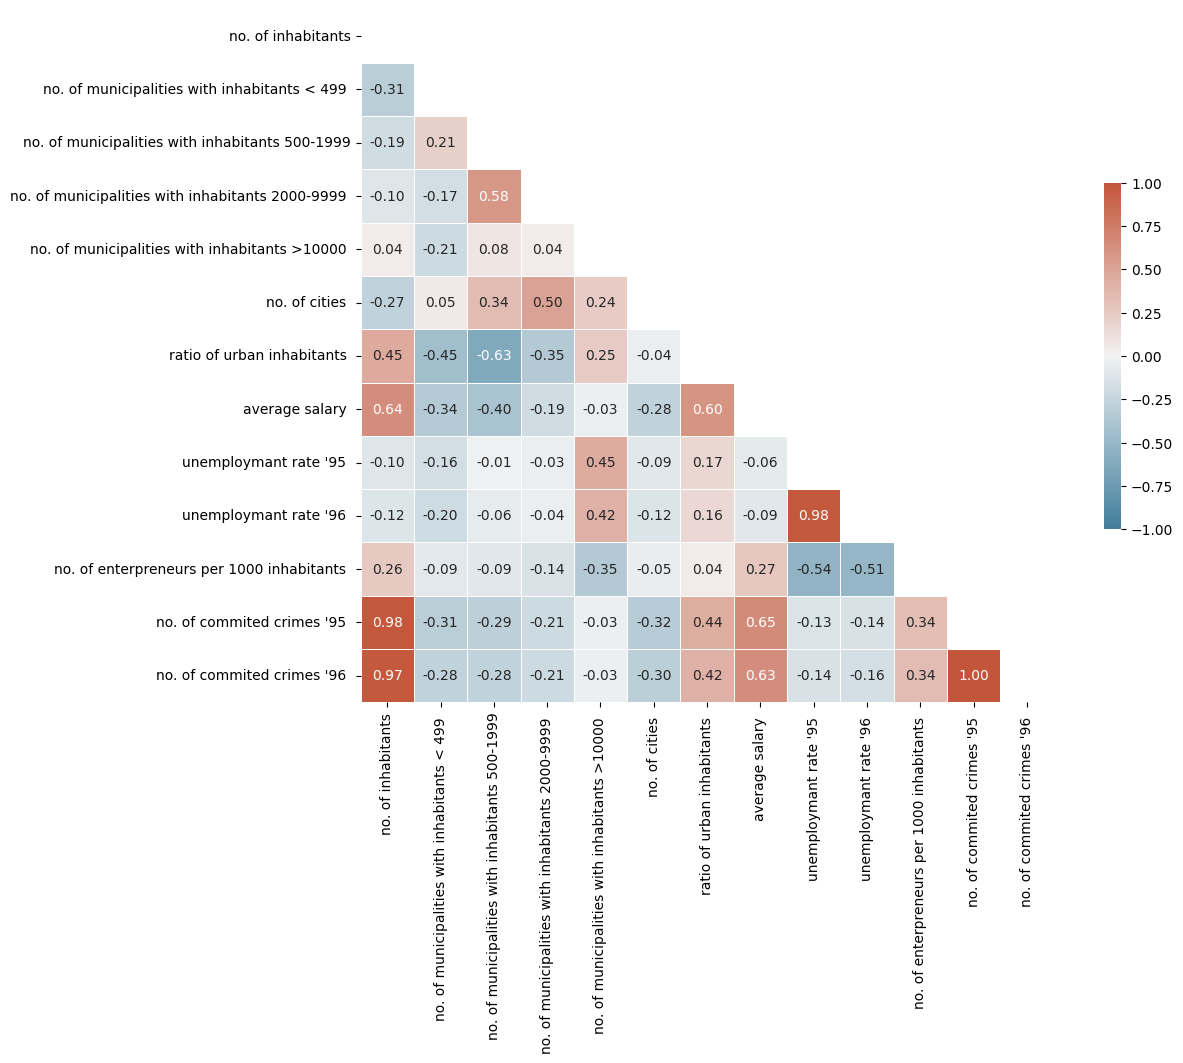

In [374]:
def corr_plot(df, size=(13, 9), annot=True):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot, fmt=".2f")

corr_plot(districts.drop(columns=['code ', 'region', 'name ']))

# High correlation between number of inhabitants and number of commited crimes
# Also between number of commited crimes in different years
# Also between number of unemployment rate in different years
# Also between average salary and commited crimes

In [375]:
# Correlation between number of commited crimes and number of inhabitants suggests that 
# crimes per capita would give more useful information
districts['no. of commited crimes \'95 '] = districts['no. of commited crimes \'95 '] / districts['no. of inhabitants']
districts['no. of commited crimes \'96 '] = districts['no. of commited crimes \'96 '] / districts['no. of inhabitants']

<AxesSubplot: xlabel='no. of inhabitants', ylabel='Count'>

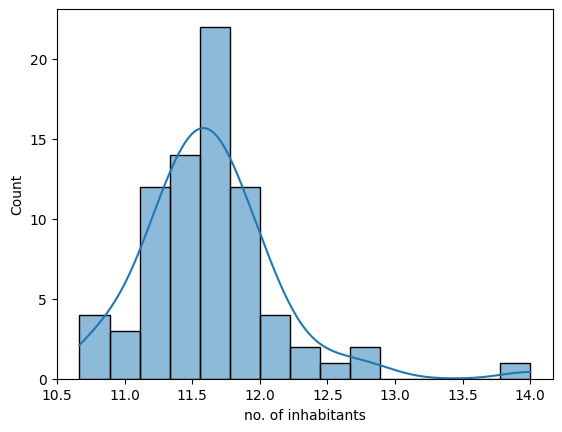

In [376]:
sns.histplot(np.log(districts['no. of inhabitants']), kde=True)

In [377]:
# Since we only have one row with missing values, it seams reasonable to complete the missing 
# values of unemployment rate and commited crimes with the mean values of the other rows
districts['unemploymant rate \'95 '].fillna(districts['unemploymant rate \'95 '].mean(), inplace=True)
districts['no. of commited crimes \'95 '].fillna(districts['no. of commited crimes \'95 '].mean(), inplace=True)

# Note: the districts table is the same for dev and comp (only one value), so it is safe to do the mean, as there is 
# no extra comp data that was missing in the dev data

In [378]:
districts.drop(['code ', 'region', 'name '], axis=1).describe()

,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,3.119342,3.787013,116.129870,0.029905,0.030799
std,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,1.654574,1.908480,16.608773,0.011230,0.011534
min,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.290000,0.430000,81.000000,0.013543,0.015946
25%,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,1.790000,2.310000,105.000000,0.020961,0.021827
50%,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,2.830000,3.600000,113.000000,0.027359,0.028500
75%,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,3.850000,4.790000,126.000000,0.036375,0.036732
max,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,7.340000,9.400000,167.000000,0.071104,0.082250


In [379]:
districts

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,0.071104,0.082250
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,0.024290,0.030084
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,0.037537,0.037391
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,0.034985,0.039308
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,0.027359,0.031794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,0.023925,0.024354
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,0.057992,0.056649
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,0.029435,0.032637
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,0.029332,0.022038


### Merge tables

In [380]:
# Merge the tables based on the foreign keys, in order to have one row per loan with all relevant information for that loan

# Merge loans and accounts and with the account district information
df = pd.merge(loans, accounts, on='account_id', how='left', suffixes=('_loan', '_account'), validate='one_to_one')
df = pd.merge(df, districts, left_on='district_id', right_on='code ', how='left', suffixes=(None, '_account_district'), validate='many_to_one')

# Merge dispositions with clients and card information
reduced_disp = pd.merge(disp, clients, on='client_id', how='left', suffixes=('_disp', '_client'), validate='one_to_one')
reduced_disp = pd.merge(reduced_disp, cards, on='disp_id', how='left', suffixes=('_disp', '_card'), validate='one_to_one')
# Missing cards replaced with "no card"
reduced_disp['type_card'] = reduced_disp['type_card'].fillna('no card')
# Merge that with the client district information
reduced_disp = pd.merge(reduced_disp, districts, left_on='district_id', right_on='code ', how='left', suffixes=(None, '_client_district'), validate='many_to_one')

# Filter by owners
owners = reduced_disp[reduced_disp['type_disp'] == 'OWNER']
owners.columns = owners.columns.map(lambda x: str(x) + '_owner' if x != 'account_id' else x)

# Filter by the other disponent
disponents = reduced_disp[reduced_disp['type_disp'] == 'DISPONENT']
disponents.columns = disponents.columns.map(lambda x: str(x) + '_disponent' if x != 'account_id' else x)

# Merge the owners and other disponents with the loans
df = pd.merge(df, owners, on='account_id', how='left', suffixes=(None, '_something_wrong'), validate='one_to_one')
df = pd.merge(df, disponents, on='account_id', how='left', suffixes=(None, '_something_wrong'), validate='one_to_one')

### Create new features based on transactions data

In [381]:
# This takes into account

def filter_relevants(trans_dev, account_id, date):
    # Take into account the date of the loan, so that future transactions are never considered
    return trans_dev.loc[trans_dev['account_id'] == account_id].loc[trans_dev['date'] < date]

rows_trans_dev = [filter_relevants(trans, row['account_id'], row['date_loan']) for _, row in df.iterrows()]

def count_condition(df, condition):
    return df.loc[condition].shape[0]

def find_credit(subtrans):
    return subtrans.loc[(subtrans['type'] == 'credit') | (subtrans['operation'] == 'credit in cash')]

def find_withdrawal(subtrans):
    # Takes into account the redudancy of the type "withdrawal in cash" which should be an operation, since the type would just be "withdrawal"
    return subtrans.loc[(subtrans['type'] == 'withdrawal') | (subtrans['type'] == 'withdrawal in cash') | (subtrans['operation'] == 'withdrawal in cash') | (subtrans['operation'] == 'credit card withdrawal')]

def signed_mean(subtrans):
    return (
        pd.concat([
            find_credit(subtrans)['amount'],
            -find_withdrawal(subtrans)['amount']
        ])
    ).mean()

# Count categorical values
df['count_trans_credits'] = [find_credit(subtrans).shape[0] for subtrans in rows_trans_dev]
df['count_trans_withdrawals'] = [find_withdrawal(subtrans).shape[0] for subtrans in rows_trans_dev]
df['count_trans_credit_cash'] = [count_condition(subtrans, (subtrans['operation'] == 'credit in cash')) for subtrans in rows_trans_dev]
df['count_trans_withdrawal_cash'] = [count_condition(subtrans, (subtrans['operation'] == 'withdrawal in cash') | (subtrans['type'] == 'withdrawal in cash')) for subtrans in rows_trans_dev]
df['count_trans_withdrawal_card'] = [count_condition(subtrans, (subtrans['operation'] == 'credit card withdrawal')) for subtrans in rows_trans_dev]
df['count_trans_collection_other_bank'] = [count_condition(subtrans, (subtrans['operation'] == 'collection from another bank')) for subtrans in rows_trans_dev]
df['count_trans_remittance_other_bank'] = [count_condition(subtrans, (subtrans['operation'] == 'remittance to another bank')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_interest_credited'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'interest credited')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_household'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'household')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_payment_for_statement'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'payment for statement')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_insurance_payment'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'insurance payment')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_sanction_interest_if_negative_balance'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'sanction interest if negative balance')) for subtrans in rows_trans_dev]
df['count_trans_ksymbol_oldage_pension'] = [count_condition(subtrans, (subtrans['k_symbol'] == 'old-age pension')) for subtrans in rows_trans_dev]

# The balance of the account after the last transaction
df['last_trans_balance'] = [subtrans.loc[subtrans['date'] == subtrans['date'].max()]['balance'].values[0] for subtrans in rows_trans_dev]

# Means
df['mean_trans_balance'] = [subtrans['balance'].mean() for subtrans in rows_trans_dev]
df['mean_trans_amount_credit'] = [find_credit(subtrans)['amount'].mean() for subtrans in rows_trans_dev]
df['mean_trans_amount_withdrawal'] = [find_withdrawal(subtrans)['amount'].mean() for subtrans in rows_trans_dev]
# mean of |amount| (both credit and withdrawal count as positive values)
df['mean_trans_amount_absolute'] = [subtrans['amount'].mean() for subtrans in rows_trans_dev]
# signed mean of amount (credit is positive, withdrawal is negative)
df['mean_trans_amount_signed'] = [signed_mean(subtrans) for subtrans in rows_trans_dev]


In [382]:
for column in ['last_trans_balance', 'mean_trans_balance', 'mean_trans_amount_credit', 'mean_trans_amount_withdrawal', 'mean_trans_amount_absolute', 'mean_trans_amount_signed']:
    print(f"Column {column} has NaNs:", df.isna().any()[column])

Column last_trans_balance has NaNs: False
Column mean_trans_balance has NaNs: False
Column mean_trans_amount_credit has NaNs: False
Column mean_trans_amount_withdrawal has NaNs: True
Column mean_trans_amount_absolute has NaNs: False
Column mean_trans_amount_signed has NaNs: False


In [383]:
# Since there were no transactions, on average the amount withdrawn should be 0
df['mean_trans_amount_withdrawal'].fillna(0, inplace=True)

In [384]:
# Drop ids
df.drop(columns=['account_id', 'disp_id_owner', 'client_id_owner', 'type_disp_owner', 'card_id_owner', 'disp_id_disponent', 'client_id_disponent', 'type_disp_disponent', 'card_id_disponent'], inplace=True)

### Extract birthdate and sex from birth_number

In [385]:
df['owner_male'] = df['birth_number_owner'].apply(lambda x: 0 if int(str(x)[2:4]) > 12 else 1)
df['owner_birthdate'] = df['birth_number_owner'].apply(lambda x: x-5000 if int(str(x)[2:4]) > 12 else x)
df['disponent_male'] = df['birth_number_disponent'].apply(lambda x: (0 if int(str(x)[2:4]) > 12 else 1) if not pd.isna(x) else x)
df['disponent_birthdate'] = df['birth_number_disponent'].apply(lambda x: (x-5000 if int(str(x)[2:4]) > 12 else x) if not pd.isna(x) else x)
df.drop(columns=['amount', 'birth_number_owner', 'birth_number_disponent', 'code ', 'code _owner', 'code _disponent'], inplace=True)


### Rename columns so that they are easier to use and more uniform

In [386]:
df.rename(columns={
    'loan_id': 'Id', 
    'status': 'Predicted',
    'date_loan': 'loan_date', 
    'duration': 'loan_duration', 
    'payments': 'loan_payments', 
    'district_id': 'account_district_code',
    'name ': 'account_district_name', # removed below
    'region': 'account_district_region',
    'no. of inhabitants': 'account_district_no_inhabitants',
    'no. of municipalities with inhabitants < 499 ': 'account_district_no_municipalities_0_499',
    'no. of municipalities with inhabitants 500-1999': 'account_district_no_municipalities_500_1999',
    'no. of municipalities with inhabitants 2000-9999 ': 'account_district_no_municipalities_2000_9999',
    'no. of municipalities with inhabitants >10000 ': 'account_district_no_municipalities_10000_plus',
    'no. of cities ': 'account_district_no_cities',
    'ratio of urban inhabitants ': 'account_district_ratio_urban_inhabitants',
    'average salary ': 'account_district_average_salary',
    'unemploymant rate \'95 ': 'account_district_unemployment_rate_95',
    'unemploymant rate \'96 ': 'account_district_unemployment_rate_96',
    'no. of enterpreneurs per 1000 inhabitants ': 'account_district_no_enterpreneurs_per_1000_inhabitants',
    'no. of commited crimes \'95 ': 'account_district_no_crimes_95',
    'no. of commited crimes \'96 ': 'account_district_no_crimes_96',
    'frequency': 'account_frequency', 
    'date_account': 'account_date', 
    'owner_male': 'owner_male',
    'owner_birthdate': 'owner_birthdate',
    'district_id_owner': 'owner_district_code',
    'name _owner': 'owner_district_name', # removed below
    'region_owner': 'owner_district_region',
    'no. of inhabitants_owner': 'owner_district_no_inhabitants',
    'no. of municipalities with inhabitants < 499 _owner': 'owner_district_no_municipalities_0_499', 
    'no. of municipalities with inhabitants 500-1999_owner': 'owner_district_no_municipalities_500_1999',
    'no. of municipalities with inhabitants 2000-9999 _owner': 'owner_district_no_municipalities_2000_9999',
    'no. of municipalities with inhabitants >10000 _owner': 'owner_district_no_municipalities_10000_plus',
    'no. of cities _owner': 'owner_district_no_cities',
    'ratio of urban inhabitants _owner': 'owner_district_ratio_urban_inhabitants',
    'average salary _owner': 'owner_district_average_salary',
    'unemploymant rate \'95 _owner': 'owner_district_unemployment_rate_95',
    'unemploymant rate \'96 _owner': 'owner_district_unemployment_rate_96',
    'no. of enterpreneurs per 1000 inhabitants _owner': 'owner_district_no_enterpreneurs_per_1000_inhabitants',
    'no. of commited crimes \'95 _owner': 'owner_district_no_crimes_95',
    'no. of commited crimes \'96 _owner': 'owner_district_no_crimes_96',
    'type_card_owner': 'owner_card_type', 
    'issued_owner': 'owner_card_issued',
    'disponent_male': 'disponent_male',
    'disponent_birthdate': 'disponent_birthdate',
    'district_id_disponent': 'disponent_district_code',
    'name _disponent': 'disponent_district_name', # removed below
    'region_disponent': 'disponent_district_region',
    'no. of inhabitants_disponent': 'disponent_district_no_inhabitants',
    'no. of municipalities with inhabitants < 499 _disponent': 'disponent_district_no_municipalities_0_499',
    'no. of municipalities with inhabitants 500-1999_disponent': 'disponent_district_no_municipalities_500_1999',
    'no. of municipalities with inhabitants 2000-9999 _disponent': 'disponent_district_no_municipalities_2000_9999',
    'no. of municipalities with inhabitants >10000 _disponent': 'disponent_district_no_municipalities_10000_plus',
    'no. of cities _disponent': 'disponent_district_no_cities',
    'ratio of urban inhabitants _disponent': 'disponent_district_ratio_urban_inhabitants',
    'average salary _disponent': 'disponent_district_average_salary',
    'unemploymant rate \'95 _disponent': 'disponent_district_unemployment_rate_95',
    'unemploymant rate \'96 _disponent': 'disponent_district_unemployment_rate_96',
    'no. of enterpreneurs per 1000 inhabitants _disponent': 'disponent_district_no_enterpreneurs_per_1000_inhabitants',
    'no. of commited crimes \'95 _disponent': 'disponent_district_no_crimes_95',
    'no. of commited crimes \'96 _disponent': 'disponent_district_no_crimes_96',
    'type_card_disponent': 'disponent_card_type', # removed below
    'issued_disponent': 'disponent_card_issued',  # removed below
    'count_trans_credits': 'count_trans_credits',
    'count_trans_withdrawals': 'count_trans_withdrawals', 
    'count_trans_credit_cash': 'count_trans_credit_cash',
    'count_trans_withdrawal_cash': 'count_trans_withdrawal_cash', 
    'count_trans_withdrawal_card': 'count_trans_withdrawal_card',
    'count_trans_collection_other_bank': 'count_trans_collection_other_bank',
    'count_trans_remittance_other_bank': 'count_trans_remittance_other_bank',
    'count_trans_ksymbol_interest_credited': 'count_trans_ksymbol_interest_credited',
    'count_trans_ksymbol_household': 'count_trans_ksymbol_household',
    'count_trans_ksymbol_payment_for_statement': 'count_trans_ksymbol_payment_for_statement',
    'count_trans_ksymbol_insurance_payment': 'count_trans_ksymbol_insurance_payment',
    'count_trans_ksymbol_sanction_interest_if_negative_balance': 'count_trans_ksymbol_sanction_interest_if_negative_balance',
    'count_trans_ksymbol_oldage_pension': 'count_trans_ksymbol_oldage_pension', 
    'last_trans_balance': 'last_trans_balance',
    'mean_trans_balance': 'mean_trans_balance', 
    'mean_trans_amount_absolute': 'mean_trans_amount_absolute',
    'mean_trans_amount_credit': 'mean_trans_amount_credit', 
    'mean_trans_amount_withdrawal': 'mean_trans_amount_withdrawal',
    'mean_trans_amount_signed': 'mean_trans_amount_signed'
}, inplace=True)

In [387]:
# Convert 1 to 0 (positive label) and -1 to 1 (negative label) in target column
df['Predicted'] = df['Predicted'].apply(lambda x: 0 if x == 1 else (1 if x == -1 else np.nan))

### Check that no column uses data from the future

In [388]:
def check_after_sanity(df, col1, col2):
    cond = (df[col1] > df[col2]) | (df[col1].isna()) | (df[col2].isna())
    notcond = ~cond
    print(f"{col1} > {col2}: {cond.all()} ({notcond.sum()} rows)")

check_after_sanity(df, 'loan_date', 'account_date')
check_after_sanity(df, 'loan_date', 'owner_card_issued')
check_after_sanity(df, 'owner_card_issued', 'account_date')


loan_date > account_date: True (0 rows)
loan_date > owner_card_issued: True (0 rows)
owner_card_issued > account_date: True (0 rows)


### Create features based on dates

In [389]:
def parse_date_single(x):
    if np.isnan(x):
        return x
    return '19' + str(x)[0:2] + '-' + str(x)[2:4] + '-' + str(x)[4:6]

def parse_date(series):
    return pd.to_datetime(series.apply(lambda x: parse_date_single(x)))

def calculate_age(born, now):
    born = parse_date(born)
    now = parse_date(now)
    born_md = born.apply(lambda x: (x.month, x.day))
    now_md = now.apply(lambda x: (x.month, x.day))
    return now.dt.year - born.dt.year - (now_md < born_md)

def calculate_months(born, now):
    born = parse_date(born)
    now = parse_date(now)
    return (now.dt.year - born.dt.year)*12 + (now.dt.month - born.dt.month) - (now.dt.day < born.dt.day)

df['owner_age'] = calculate_age(df['owner_birthdate'], df['loan_date'])
df['account_age_months'] = calculate_months(df['account_date'], df['loan_date'])
df['disponent_age'] = calculate_age(df['disponent_birthdate'], df['loan_date'])

df[df['owner_age'] < 17][['owner_age', 'disponent_age', 'Predicted']]

,owner_age,disponent_age,Predicted
4,14,NaN,0.0
5,13,7.0,0.0
16,14,NaN,0.0
62,15,NaN,1.0
69,14,NaN,0.0
104,15,NaN,0.0
116,16,NaN,0.0
142,14,12.0,0.0
173,14,14.0,0.0
193,15,NaN,0.0


In [390]:
df[['owner_age', 'disponent_age', 'account_age_months']].describe()
# There are minors in the dataset


,owner_age,disponent_age,account_age_months
count,682.000000,145.000000,682.000000
mean,37.630499,38.765517,12.601173
std,12.768289,14.489946,5.414062
min,13.000000,7.000000,3.000000
25%,27.000000,28.000000,8.000000
50%,37.000000,40.000000,12.000000
75%,48.000000,52.000000,17.000000
max,61.000000,63.000000,22.000000


In [391]:
df[df['owner_age'] < 17][['owner_age', 'disponent_age', 'Predicted']]
# Most minors don't have a disponent or have a disponent who is also a minor

,owner_age,disponent_age,Predicted
4,14,NaN,0.0
5,13,7.0,0.0
16,14,NaN,0.0
62,15,NaN,1.0
69,14,NaN,0.0
104,15,NaN,0.0
116,16,NaN,0.0
142,14,12.0,0.0
173,14,14.0,0.0
193,15,NaN,0.0


In [392]:
# These date columns are not needed anymore, as they were replaced by age columns
df.drop(columns=['owner_birthdate', 'disponent_birthdate', 'account_date'], inplace=True)

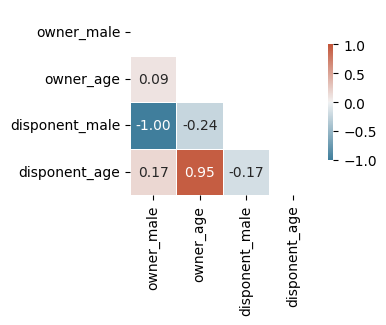

In [393]:
corr_plot(df[['owner_male', 'owner_age', 'disponent_male', 'disponent_age',]], size=(3, 3))
# Disponent male and owner male correlated negatively (shared accounts have a man and a woman)
# Ages are correlated positively (account sharers have approximatedly the same age)

### Missing data after processing

In [394]:
# Missing values after previous processing
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.to_csv('output/percent_missing.csv')
for row in percent_missing.iteritems():
    print(f"{row[0]}: {row[1]:.4}%")

# Missing values come from disponent information (since many accounts don't have another disponent)
# and from the card issued date (since many clients don't have a card)

Id: 0.0%
loan_date: 0.0%
loan_duration: 0.0%
loan_payments: 0.0%
Predicted: 51.91%
account_district_code: 0.0%
account_frequency: 0.0%
account_district_name: 0.0%
account_district_region: 0.0%
account_district_no_inhabitants: 0.0%
account_district_no_municipalities_0_499: 0.0%
account_district_no_municipalities_500_1999: 0.0%
account_district_no_municipalities_2000_9999: 0.0%
account_district_no_municipalities_10000_plus: 0.0%
account_district_no_cities: 0.0%
account_district_ratio_urban_inhabitants: 0.0%
account_district_average_salary: 0.0%
account_district_unemployment_rate_95: 0.0%
account_district_unemployment_rate_96: 0.0%
account_district_no_enterpreneurs_per_1000_inhabitants: 0.0%
account_district_no_crimes_95: 0.0%
account_district_no_crimes_96: 0.0%
owner_district_code: 0.0%
owner_card_type: 0.0%
owner_card_issued: 94.72%
owner_district_name: 0.0%
owner_district_region: 0.0%
owner_district_no_inhabitants: 0.0%
owner_district_no_municipalities_0_499: 0.0%
owner_district_no_mun

C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\1288207933.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row in percent_missing.iteritems():


In [395]:
df.drop(columns=['owner_card_issued'], inplace=True)

In [396]:
disp[disp['disp_id'].isin(cards['disp_id'])]['type'].value_counts()
# All cards are from OWNERS - Remove disponent card information


OWNER    202
Name: type, dtype: int64

In [397]:
# Names are strings (and are equivalent to codes) so they are only useful for human readability, not for the model
df.drop(columns=['disponent_card_type', 'disponent_card_issued', 'account_district_name', 'owner_district_name', 'disponent_district_name'], inplace=True)

In [398]:
# These work as primary keys, so they will not be able to help the model especially with the little training data we have
df.drop(columns=['account_district_code', 'owner_district_code', 'disponent_district_code'], inplace=True)

In [399]:
# Replace disponent information by "has_disponent" feature

df['has_disponent'] = df['disponent_male'].apply(lambda x: 0 if np.isnan(x) else 1)
df.drop(columns=[
    'disponent_district_region',
    'disponent_district_no_inhabitants',
    'disponent_district_no_municipalities_0_499',
    'disponent_district_no_municipalities_500_1999',
    'disponent_district_no_municipalities_2000_9999',
    'disponent_district_no_municipalities_10000_plus',
    'disponent_district_no_cities',
    'disponent_district_ratio_urban_inhabitants',
    'disponent_district_average_salary',
    'disponent_district_unemployment_rate_95',
    'disponent_district_unemployment_rate_96',
    'disponent_district_no_enterpreneurs_per_1000_inhabitants',
    'disponent_district_no_crimes_95',
    'disponent_district_no_crimes_96',
    'disponent_male',
    'disponent_age',
], inplace=True)

In [400]:
df

,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,account_district_no_municipalities_2000_9999,account_district_no_municipalities_10000_plus,account_district_no_cities,account_district_ratio_urban_inhabitants,account_district_average_salary,account_district_unemployment_rate_95,account_district_unemployment_rate_96,account_district_no_enterpreneurs_per_1000_inhabitants,account_district_no_crimes_95,account_district_no_crimes_96,owner_card_type,owner_district_region,owner_district_no_inhabitants,owner_district_no_municipalities_0_499,owner_district_no_municipalities_500_1999,owner_district_no_municipalities_2000_9999,owner_district_no_municipalities_10000_plus,owner_district_no_cities,owner_district_ratio_urban_inhabitants,owner_district_average_salary,owner_district_unemployment_rate_95,owner_district_unemployment_rate_96,owner_district_no_enterpreneurs_per_1000_inhabitants,owner_district_no_crimes_95,owner_district_no_crimes_96,count_trans_credits,count_trans_withdrawals,count_trans_credit_cash,count_trans_withdrawal_cash,count_trans_withdrawal_card,count_trans_collection_other_bank,count_trans_remittance_other_bank,count_trans_ksymbol_interest_credited,count_trans_ksymbol_household,count_trans_ksymbol_payment_for_statement,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_absolute,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent
0,5314,930705,12,8033,1.0,weekly issuance,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100,0.031483,0.029574,no card,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100,0.031483,0.029574,4,0,4,0,0,0,0,0,0,0,0,0,0,20100.0,12250.000000,5025.000000,0.000000,5025.000000,5025.000000,0,45,3,0
1,5316,930711,36,4610,0.0,monthly issuance,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117,0.025322,0.023228,no card,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117,0.025322,0.023228,17,20,12,12,0,0,8,5,2,3,0,0,0,52208.9,52083.859459,13523.158824,8884.240000,11015.635135,1411.051351,1,24,4,0
2,6863,930728,60,2118,0.0,monthly issuance,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132,0.026695,0.027234,no card,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132,0.026695,0.027234,15,9,2,6,0,5,3,8,1,0,0,0,0,20272.8,30060.954167,5009.733333,6097.000000,5417.458333,844.708333,1,57,5,0
3,5325,930803,36,2939,0.0,monthly issuance,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,0.035265,0.035858,no card,south Bohemia,177686,69,27,10,1,9,74.8,10045,1.42,1.71,135,0.037167,0.035428,13,12,2,10,0,6,2,5,2,2,0,0,0,34307.3,41297.480000,9254.600000,7168.100000,8253.080000,1371.704000,0,53,6,0
4,7240,930906,60,4579,0.0,weekly issuance,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,0.071104,0.082250,no card,south Moravia,86513,38,36,5,1,5,50.5,8288,3.79,4.52,110,0.018055,0.016876,13,14,1,11,0,6,3,6,1,2,0,0,0,41112.9,57188.211111,21255.930769,16801.000000,18945.966667,1522.707407,1,14,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4989,981205,48,7348,NaN,monthly issuance,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.51,2.07,123,0.022245,0.022778,classic,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.51,2.07,123,0.022245,0.022778,29,27,14,27,0,0,0,15,0,7,0,0,0,35875.3,30797.487500,8806.779310,8341.525926,8582.460714,538.846429,0,47,16,0
678,5221,981205,12,4376,NaN,monthly issuance,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,0.023299,0.024796,no card,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,0.02

### Plots of processed data

<AxesSubplot: xlabel='Predicted', ylabel='count'>

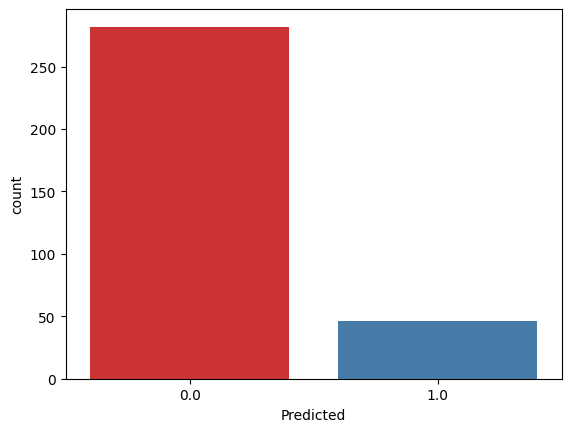

In [401]:
sns.countplot(df, x='Predicted', palette='Set1')

# Unbalanced data, sampling probably needed

C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_7232\2092671786.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


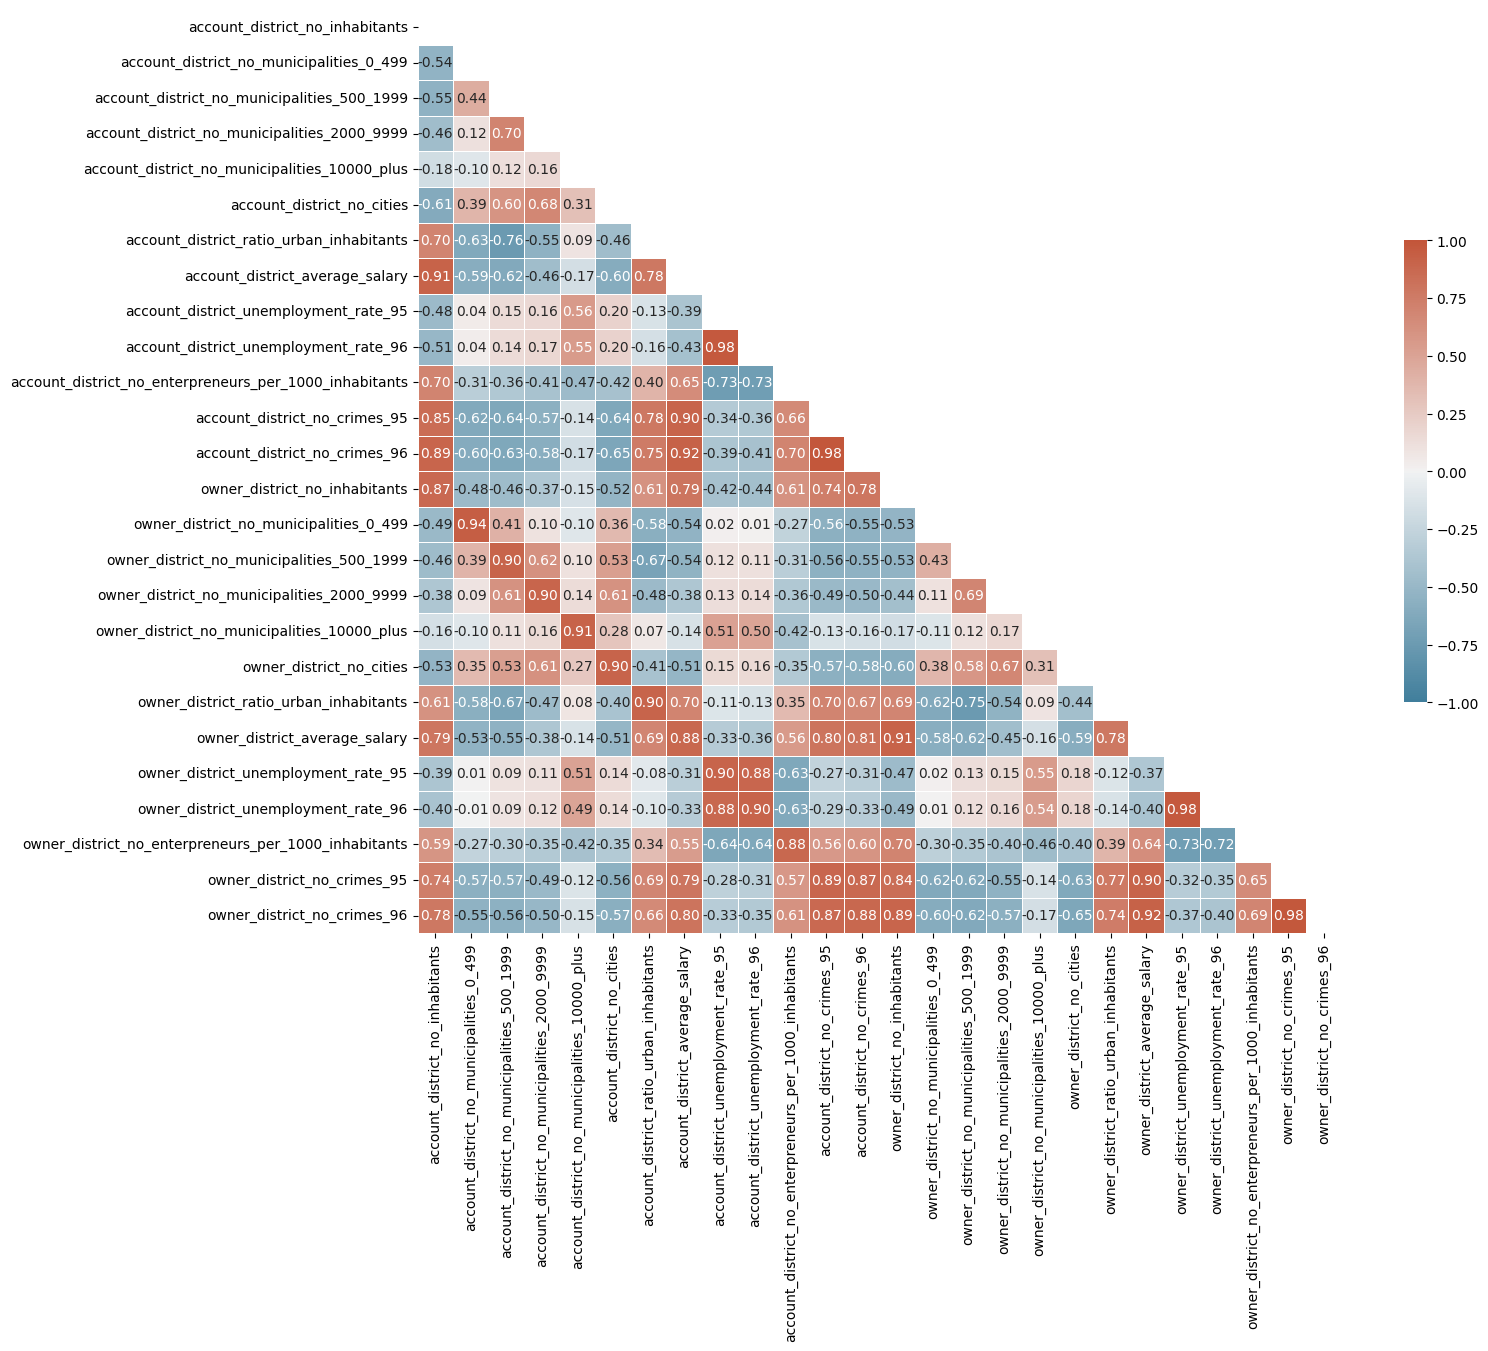

In [402]:
corr_plot(df[[
    'account_district_region',
    'account_district_no_inhabitants',
    'account_district_no_municipalities_0_499',
    'account_district_no_municipalities_500_1999',
    'account_district_no_municipalities_2000_9999',
    'account_district_no_municipalities_10000_plus',
    'account_district_no_cities',
    'account_district_ratio_urban_inhabitants',
    'account_district_average_salary',
    'account_district_unemployment_rate_95',
    'account_district_unemployment_rate_96',
    'account_district_no_enterpreneurs_per_1000_inhabitants',
    'account_district_no_crimes_95',
    'account_district_no_crimes_96',
    'owner_district_region',
    'owner_district_no_inhabitants',
    'owner_district_no_municipalities_0_499',
    'owner_district_no_municipalities_500_1999',
    'owner_district_no_municipalities_2000_9999',
    'owner_district_no_municipalities_10000_plus',
    'owner_district_no_cities',
    'owner_district_ratio_urban_inhabitants',
    'owner_district_average_salary',
    'owner_district_unemployment_rate_95',
    'owner_district_unemployment_rate_96',
    'owner_district_no_enterpreneurs_per_1000_inhabitants',
    'owner_district_no_crimes_95',
    'owner_district_no_crimes_96',
]], size=(16, 12))

# Onwer and account district data are highly correlated, so we only need to use one of them


<AxesSubplot: xlabel='last_trans_balance', ylabel='mean_trans_balance'>

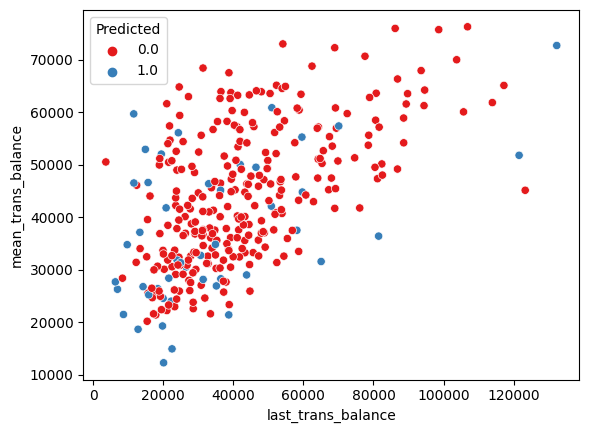

In [403]:
sns.scatterplot(df, y='mean_trans_balance', x='last_trans_balance', hue='Predicted', palette='Set1')

<AxesSubplot: xlabel='count_trans_credits', ylabel='count_trans_withdrawals'>

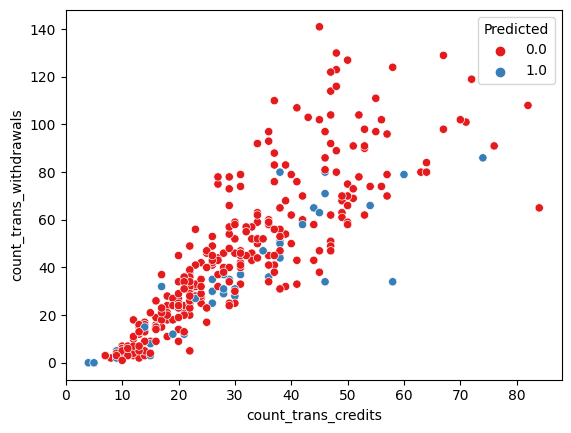

In [404]:
sns.scatterplot(df, x='count_trans_credits', y='count_trans_withdrawals', hue='Predicted', palette='Set1')

# credits and withdrawals are correlated

<AxesSubplot: xlabel='count_trans_ksymbol_sanction_interest_if_negative_balance', ylabel='count'>

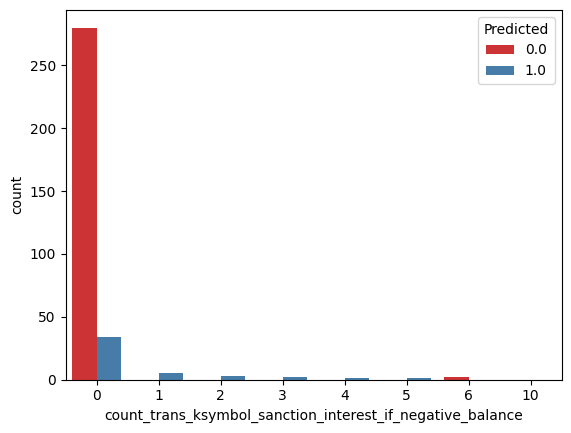

In [405]:
sns.countplot(df, x='count_trans_ksymbol_sanction_interest_if_negative_balance', hue='Predicted', palette='Set1')

# Most loaners with sanction interest for negative balance have not paid the loan
# The only exception are the very few loaners with 6 of such transactions, which is an odd outlier

<AxesSubplot: xlabel='last_trans_balance', ylabel='loan_payments'>

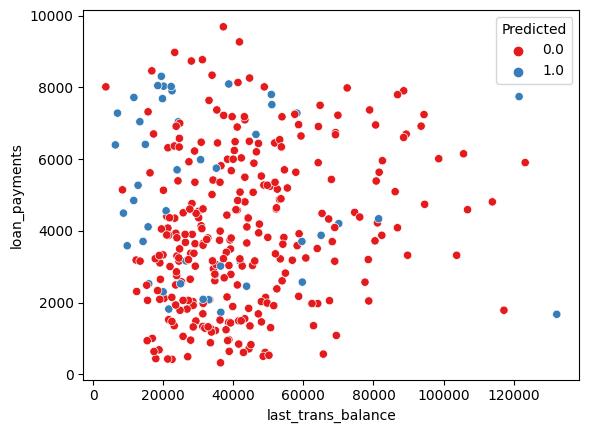

In [406]:
sns.scatterplot(df, x='last_trans_balance', y='loan_payments', hue='Predicted', palette='Set1')
# If the loan is big and the balance of the account after its last transaction is low, it’s likely the client will fail to pay the rest.

<AxesSubplot: xlabel='mean_trans_balance', ylabel='loan_payments'>

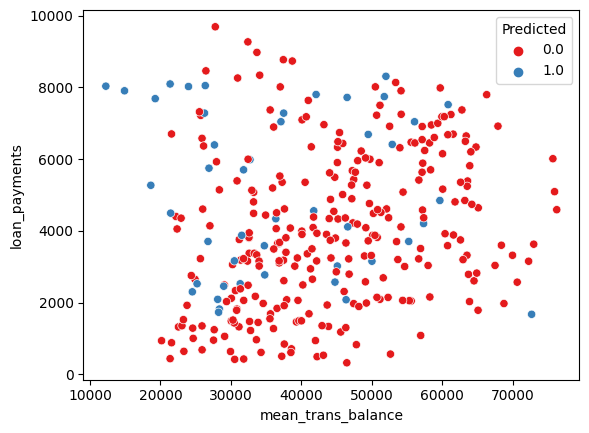

In [407]:
sns.scatterplot(df, x='mean_trans_balance', y='loan_payments', hue='Predicted', palette='Set1')

# The previous tendency is not as clear with the mean transaction balance

<AxesSubplot: xlabel='owner card type', ylabel='count'>

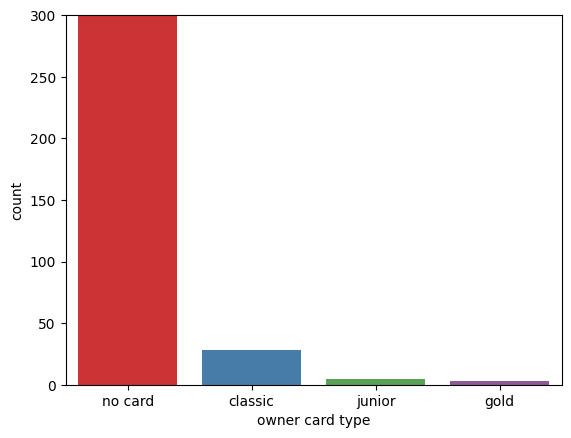

In [409]:
plt.ylim(0, 300)
df['owner_card_type'].value_counts()
sns.countplot(tempdf, x='owner card type', palette='Set1')

### Encode categorical features

In [412]:
# encode string to int
DISTRICT_REGION_ENCODING = {
    'south Moravia': 0,
    'north Moravia': 1,
    'central Bohemia': 2,
    'east Bohemia': 3,
    'Prague': 4,
    'north Bohemia': 5,
    'south Bohemia': 6,
    'west Bohemia': 7
}

CARD_TYPE_ENCODING = {'no card': 0, 'junior': 1, 'classic': 2, 'gold': 3}

ACCOUNT_FREQUENCY_ENCODING = {'issuance after transaction': 0, 'weekly issuance': 1, 'monthly issuance': 2}

df['account_frequency'].replace(ACCOUNT_FREQUENCY_ENCODING, inplace=True)
df['account_district_region'].replace(DISTRICT_REGION_ENCODING, inplace=True)
df['owner_district_region'].replace(DISTRICT_REGION_ENCODING, inplace=True)
df['owner_card_type'].replace(CARD_TYPE_ENCODING, inplace=True)

In [413]:
# Print all column names
for i in df.columns: 
    print(f"'{i}',")

'Id',
'loan_date',
'loan_duration',
'loan_payments',
'Predicted',
'account_frequency',
'account_district_region',
'account_district_no_inhabitants',
'account_district_no_municipalities_0_499',
'account_district_no_municipalities_500_1999',
'account_district_no_municipalities_2000_9999',
'account_district_no_municipalities_10000_plus',
'account_district_no_cities',
'account_district_ratio_urban_inhabitants',
'account_district_average_salary',
'account_district_unemployment_rate_95',
'account_district_unemployment_rate_96',
'account_district_no_enterpreneurs_per_1000_inhabitants',
'account_district_no_crimes_95',
'account_district_no_crimes_96',
'owner_card_type',
'owner_district_region',
'owner_district_no_inhabitants',
'owner_district_no_municipalities_0_499',
'owner_district_no_municipalities_500_1999',
'owner_district_no_municipalities_2000_9999',
'owner_district_no_municipalities_10000_plus',
'owner_district_no_cities',
'owner_district_ratio_urban_inhabitants',
'owner_district_avera

In [414]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
df.head()

,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,account_district_no_municipalities_2000_9999,account_district_no_municipalities_10000_plus,account_district_no_cities,account_district_ratio_urban_inhabitants,account_district_average_salary,account_district_unemployment_rate_95,account_district_unemployment_rate_96,account_district_no_enterpreneurs_per_1000_inhabitants,account_district_no_crimes_95,account_district_no_crimes_96,owner_card_type,owner_district_region,owner_district_no_inhabitants,owner_district_no_municipalities_0_499,owner_district_no_municipalities_500_1999,owner_district_no_municipalities_2000_9999,owner_district_no_municipalities_10000_plus,owner_district_no_cities,owner_district_ratio_urban_inhabitants,owner_district_average_salary,owner_district_unemployment_rate_95,owner_district_unemployment_rate_96,owner_district_no_enterpreneurs_per_1000_inhabitants,owner_district_no_crimes_95,owner_district_no_crimes_96,count_trans_credits,count_trans_withdrawals,count_trans_credit_cash,count_trans_withdrawal_cash,count_trans_withdrawal_card,count_trans_collection_other_bank,count_trans_remittance_other_bank,count_trans_ksymbol_interest_credited,count_trans_ksymbol_household,count_trans_ksymbol_payment_for_statement,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_absolute,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent
0,5314,930705,12,8033,1.0,1,7,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100,0.031483,0.029574,0,7,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100,0.031483,0.029574,4,0,4,0,0,0,0,0,0,0,0,0,0,20100.0,12250.000000,5025.000000,0.00,5025.000000,5025.000000,0,45,3,0
1,5316,930711,36,4610,0.0,2,3,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117,0.025322,0.023228,0,3,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117,0.025322,0.023228,17,20,12,12,0,0,8,5,2,3,0,0,0,52208.9,52083.859459,13523.158824,8884.24,11015.635135,1411.051351,1,24,4,0
2,6863,930728,60,2118,0.0,2,3,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132,0.026695,0.027234,0,3,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132,0.026695,0.027234,15,9,2,6,0,5,3,8,1,0,0,0,0,20272.8,30060.954167,5009.733333,6097.00,5417.458333,844.708333,1,57,5,0
3,5325,930803,36,2939,0.0,2,2,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,0.035265,0.035858,0,6,177686,69,27,10,1,9,74.8,10045,1.42,1.71,135,0.037167,0.035428,13,12,2,10,0,6,2,5,2,2,0,0,0,34307.3,41297.480000,9254.600000,7168.10,8253.080000,1371.704000,0,53,6,0
4,7240,930906,60,4579,0.0,1,4,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,0.071104,0.082250,0,0,86513,38,36,5,1,5,50.5,8288,3.79,4.52,110,0.018055,0.016876,13,14,1,11,0,6,3,6,1,2,0,0,0,41112.9,57188.211111,21255.930769,16801.00,18945.966667,1522.707407,1,14,6,0


In [415]:
df.describe()

,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,account_district_no_municipalities_2000_9999,account_district_no_municipalities_10000_plus,account_district_no_cities,account_district_ratio_urban_inhabitants,account_district_average_salary,account_district_unemployment_rate_95,account_district_unemployment_rate_96,account_district_no_enterpreneurs_per_1000_inhabitants,account_district_no_crimes_95,account_district_no_crimes_96,owner_card_type,owner_district_region,owner_district_no_inhabitants,owner_district_no_municipalities_0_499,owner_district_no_municipalities_500_1999,owner_district_no_municipalities_2000_9999,owner_district_no_municipalities_10000_plus,owner_district_no_cities,owner_district_ratio_urban_inhabitants,owner_district_average_salary,owner_district_unemployment_rate_95,owner_district_unemployment_rate_96,owner_district_no_enterpreneurs_per_1000_inhabitants,owner_district_no_crimes_95,owner_district_no_crimes_96,count_trans_credits,count_trans_withdrawals,count_trans_credit_cash,count_trans_withdrawal_cash,count_trans_withdrawal_card,count_trans_collection_other_bank,count_trans_remittance_other_bank,count_trans_ksymbol_interest_credited,count_trans_ksymbol_household,count_trans_ksymbol_payment_for_statement,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_absolute,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent
count,682.000000,682.000000,682.000000,682.000000,328.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.000000,682.0,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,963027.910557,36.492669,4190.664223,0.140244,1.772727,2.857771,2.720522e+05,39.673021,21.557185,5.648094,1.712610,5.406158,68.212903,9502.986804,2.893995,3.528431,121.218475,0.035249,0.037178,0.102639,2.838710,2.638447e+05,40.249267,21.722874,5.736070,1.724340,5.445748,67.863930,9469.230205,2.908438,3.551598,120.585044,0.034721,0.036552,32.049853,48.146628,14.384164,37.171554,0.112903,3.793255,10.862170,13.872434,5.741935,8.378299,0.0,0.118768,0.0,42691.233724,43606.789462,12042.899063,8141.951569,9488.653075,897.169919,0.489736,37.630499,12.601173,0.212610
std,682.579279,14616.406049,17.075219,2215.830344,0.347770,0.519478,2.262250,3.583320e+05,33.673348,15.780258,4.588747,1.110404,2.868251,20.245469,1323.150982,1.864896,2.146775,23.366091,0.016906,0.019608,0.448223,2.269073,3.494870e+05,33.656327,15.792925,4.611563,1.119954,2.855937,20.090892,1301.835849,1.847428,2.140448,23.004614,0.016658,0.019272,15.131839,31.578570,11.444647,22.104907,0.749259,6.420627,14.894294,7.628864,6.011074,5.452289,0.0,0.708020,0.0,22583.009362,13481.855233,5579.315216,4538.055699,4445.467473,1086.789282,0.500262,12.768289,5.414062,0.409454
min,4959.000000,930705.000000,12.000000,304.000000,0.000000,0.000000,0.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.290000,0.430000,81.000000,0.013543,0.015946,0.000000,0.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.290000,0.430000,81.000000,0.013543,0.015946,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-1571.500000,5350

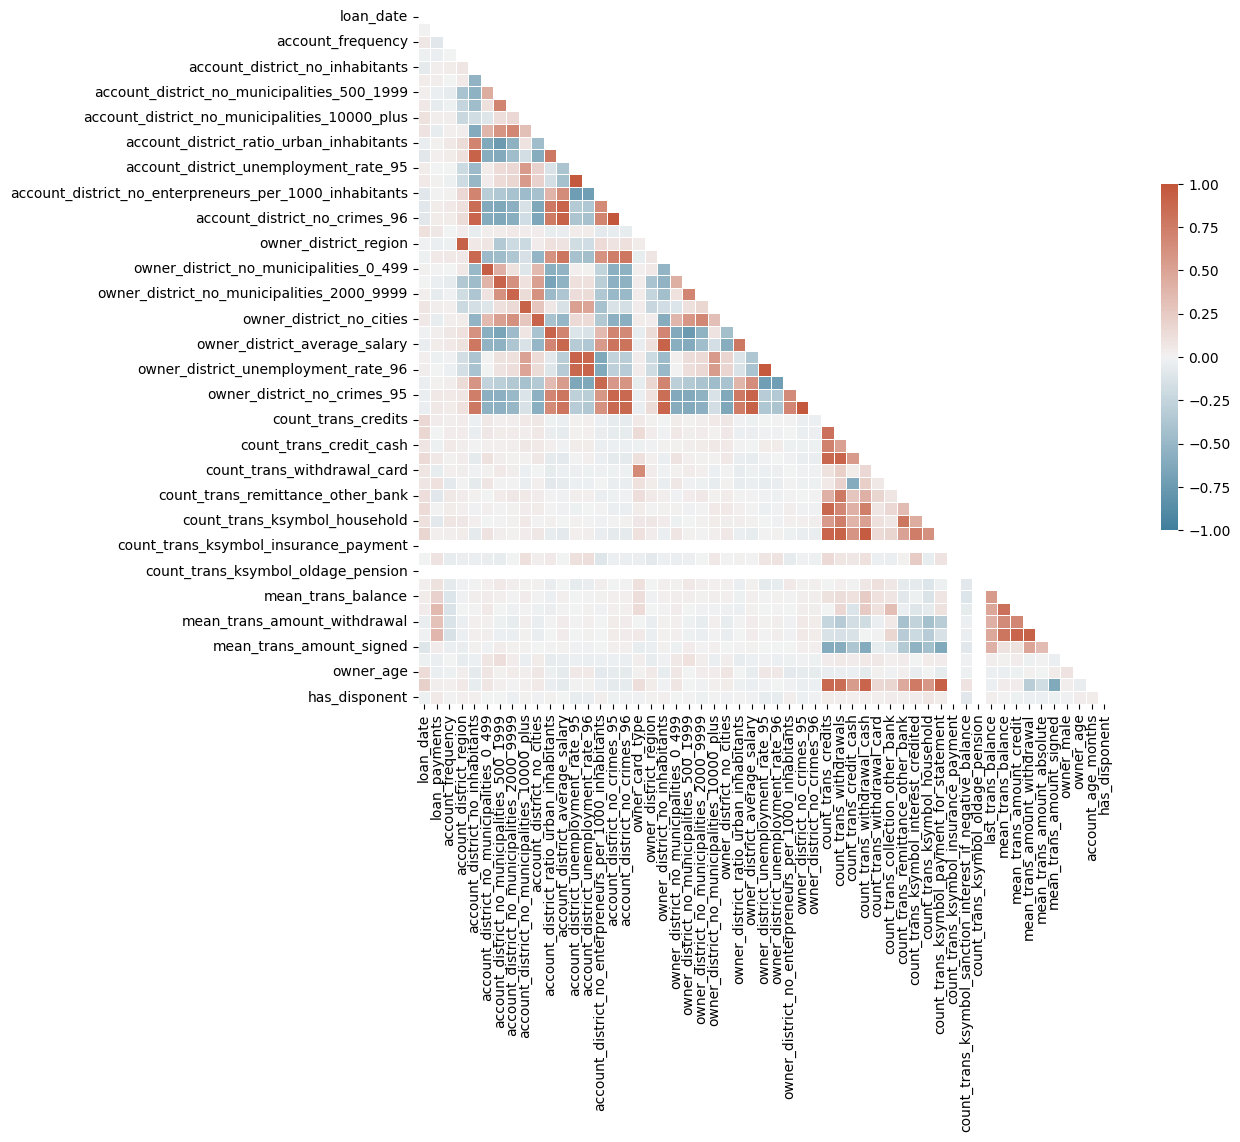

In [416]:
corr_plot(df.drop(columns=['Predicted', 'Id', 'loan_duration']), annot=False)
# Disponent male and owner male correlated negatively (man and woman)

# Save data

In [ ]:
df.to_csv('output/loan.csv', index=False)

df = df.sort_values(by='loan_date')
competition = df[df['Predicted'].isna()]
data = df[~df['Predicted'].isna()]

data.to_csv('output/ALL_PART_DEV.csv', index=False)
competition.to_csv('output/ALL_PART_COMP.csv', index=False)
